# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Inteligência Artificial Aplicada a Finanças</font>

## <font color='blue'>Projeto 1 - Parte 5</font>
### <font color='blue'>Analisando Tendências no Valor de Títulos Públicos do Tesouro Direto ao Longo do Tempo</font>

![title](imagens/P1.png)

Vamos concluir o Projeto com a técnica de Diferenciação.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [4]:
# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib : 3.5.1
pandas     : 1.4.2
numpy      : 1.21.5
statsmodels: 0.13.2
seaborn    : 0.11.2



## Carregando o Conjunto de Dados

Vamos carregar o dataset com nossa série temporal dos valores de um título público do Tesouro Direto.

In [6]:
# Carrega os dados
dados_serie = pd.read_csv('dados/dataset.csv', 
                          header = None)

In [7]:
# Série
dados_serie.head()

,0,1
0,2004-01,112
1,2004-02,118
2,2004-03,132
3,2004-04,129
4,2004-05,121


In [8]:
# Ajusta o nome das colunas
dados_serie.columns = ['data', 'valor_titulo']

In [9]:
# Série
dados_serie.head()

,data,valor_titulo
0,2004-01,112
1,2004-02,118
2,2004-03,132
3,2004-04,129
4,2004-05,121


In [10]:
# Converte a data no formato apropriado
dados_serie['data'] = pd.to_datetime(dados_serie['data'], format = '%Y-%m')

In [11]:
# Série
dados_serie.head()

,data,valor_titulo
0,2004-01-01,112
1,2004-02-01,118
2,2004-03-01,132
3,2004-04-01,129
4,2004-05-01,121


In [12]:
# Define a data como índice da série
dados_serie = dados_serie.set_index('data')

In [13]:
# Série
dados_serie.head()

,valor_titulo
data,
2004-01-01,112
2004-02-01,118
2004-03-01,132
2004-04-01,129
2004-05-01,121


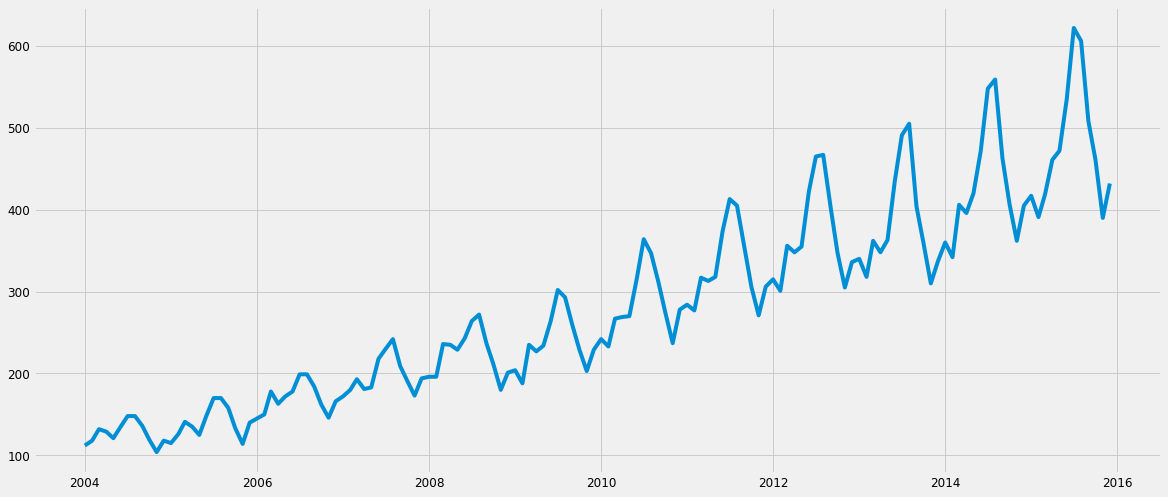

In [14]:
# Plot
plt.plot(dados_serie)

In [15]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    
    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

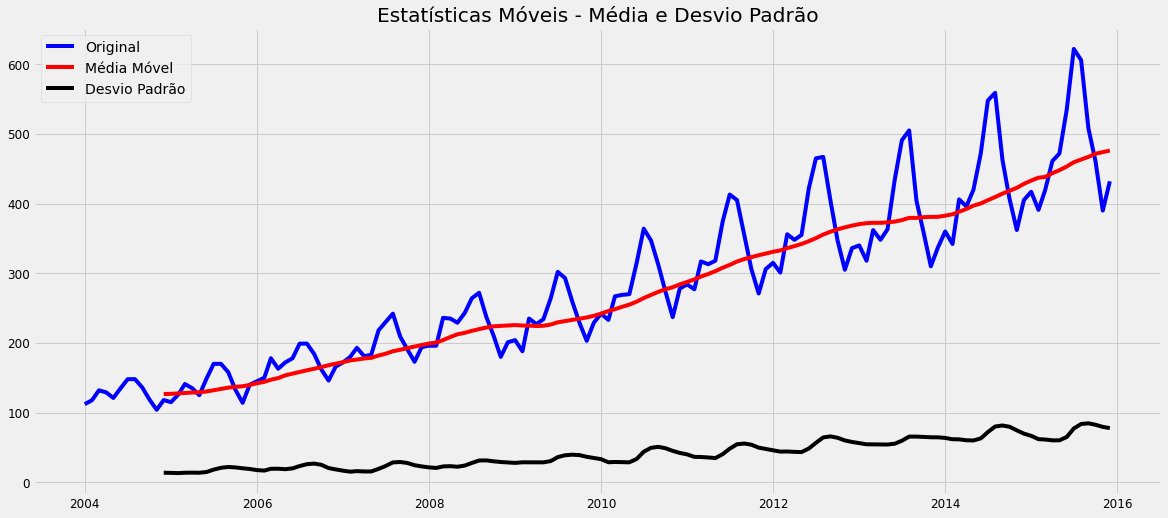


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.817848
Valor-p                           0.991919
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [16]:
# Vamos testar a estacionaridade da série antes de qualquer transformação
testa_estacionaridade(dados_serie)

A série claramente não é estacionária. Média e variância (nesse caso desvio padrão, que é raiz quadrada da variância) variam ao longo do tempo. 

### Diferenciação Para Remover Tendência

Vamos primeiro colocar os dados na mesma escala com a transformação de log e em seguida aplicar a diferenciação.

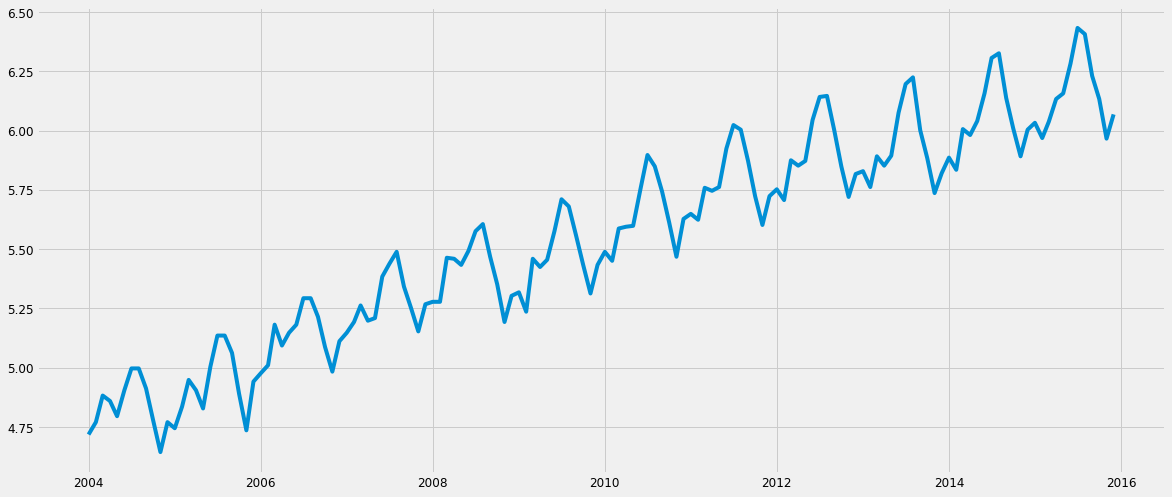

In [17]:
# Transformação de log
dados_serie_log = np.log(dados_serie)
plt.plot(dados_serie_log)

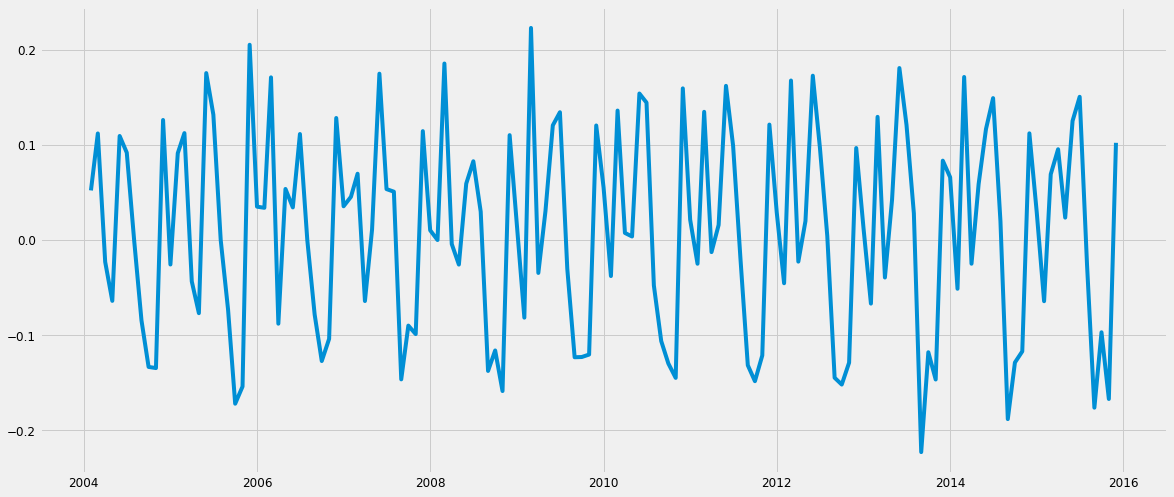

In [18]:
# Diferenciação Para Remover Tendência - Exemplo 1
# O método shift() move os dados em uma unidade
# Observe que estamos usando a série com transformação de log já aplicada
dados_serie_diff1 = dados_serie_log.valor_titulo - dados_serie_log.valor_titulo.shift()
plt.plot(dados_serie_diff1)

In [19]:
# Você pode criar sua função para diferenciação, se desejar:
def diffFunc(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

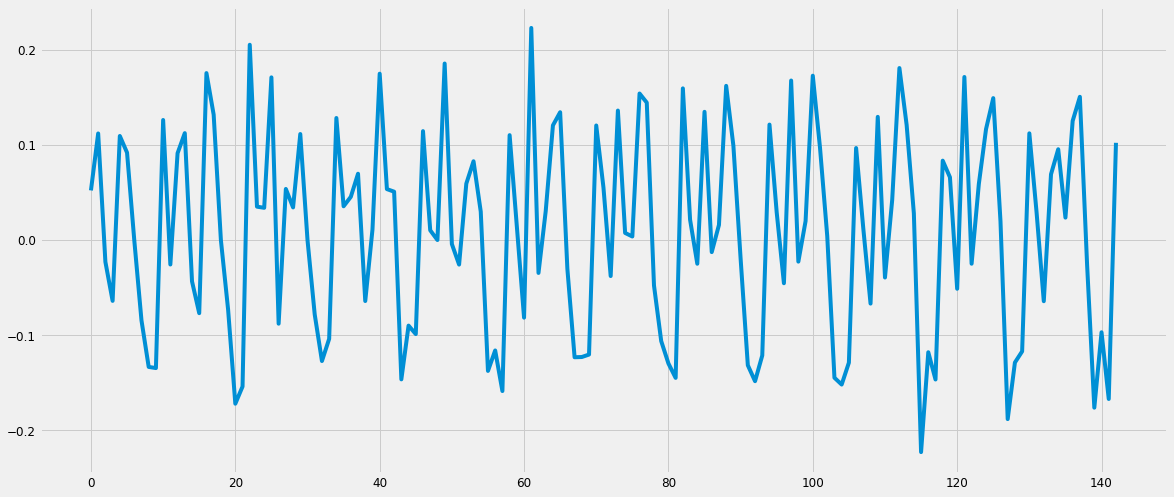

In [20]:
# Diferenciação Para Remover Tendência - Exemplo 2
# Observe que estamos usando a série com transformação de log
dados_serie_diff2 = diffFunc(dados_serie_log['valor_titulo'])
plt.plot(dados_serie_diff2)

In [21]:
# Converte em dataframe, a lista gerada ao aplicar a diferenciação
dados_serie_diff2_df = pd.DataFrame(dados_serie_diff2) 

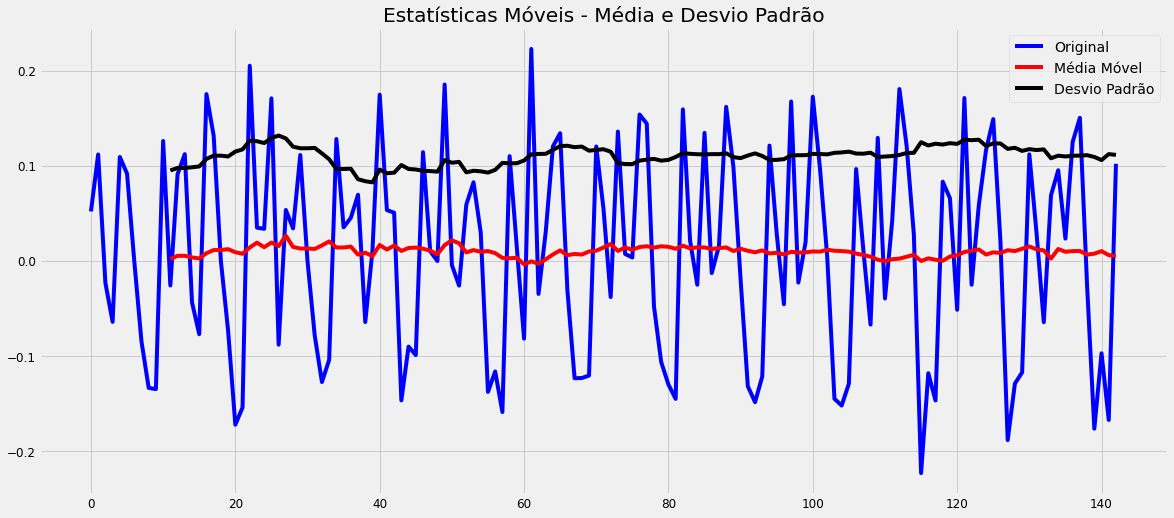


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -2.715922
Valor-p                           0.071323
Número de Lags Consideradas      14.000000
Número de Observações Usadas    128.000000
Valor Crítico (1%)               -3.482501
Valor Crítico (5%)               -2.884398
Valor Crítico (10%)              -2.578960
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [22]:
# Vamos testar a estacionaridade da série após a diferenciação para remover a tendência
# Como os 2 exemplos anteriores geram o mesmo resultado, vamos usar o segundo
testa_estacionaridade(dados_serie_diff2_df)

O valor-p reduziu bastante e está quase próximo do limite e média e variância estão quase constantes. Talvez remover somente a tendência ou somente a sazonalidade não seja suficiente. Temos na verdade que remover ambos. Vamos fazer isso agora.

### Diferenciação Para Remover Sazonalidade

O exemplo abaixo aplica a função diffFunc() à última versão da nossa série até aqui, com transformacão de log e diferenciação para remoer tendência. 

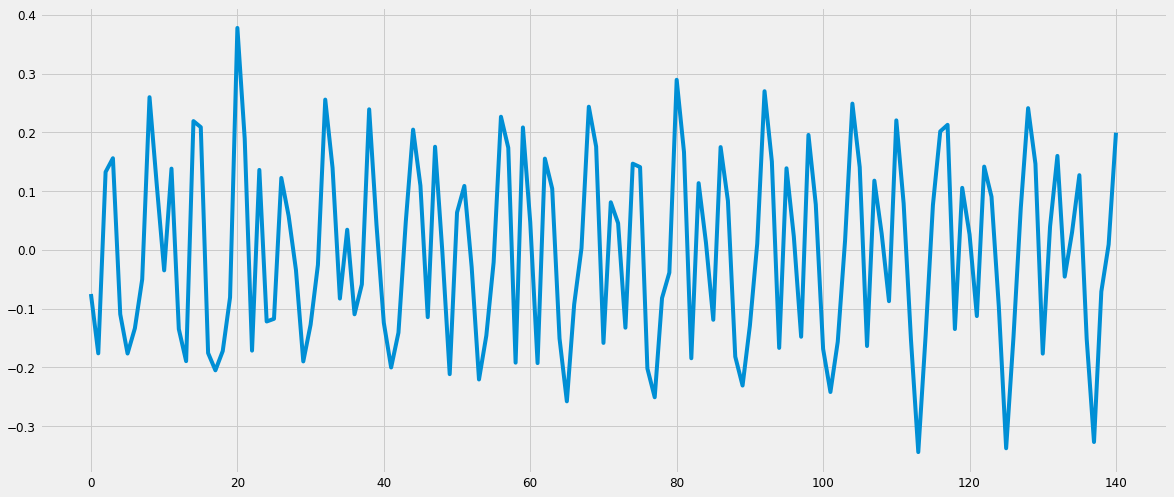

In [23]:
# Diferenciação para remover sazonalidade
# Observe o valor 2. Representa o intervalo para calcular a diferenciação. 
# Colocamos o valor 2 apenas para mostrar que é possível, mas se usarmos o valor 1 como usamos na 
# primeira diferenciação, o resultado é tão bom quanto.
dados_serie_diff3 = diffFunc(dados_serie_diff2, 2)
plt.plot(dados_serie_diff3)

In [24]:
# Converte em dataframe a lista gerada ao aplicar a diferenciação
dados_serie_final = pd.DataFrame(dados_serie_diff3) 

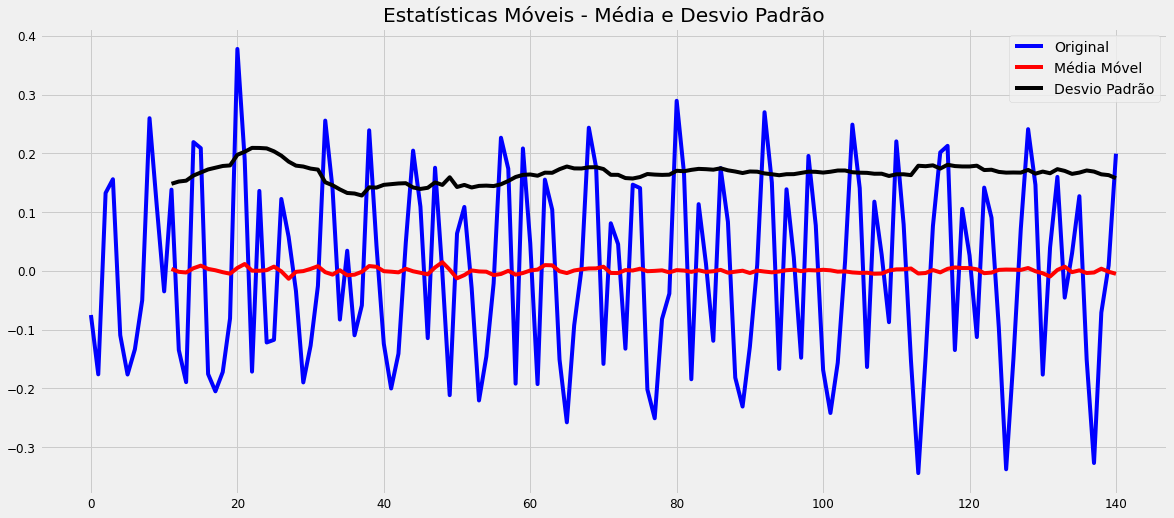


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -1.481930e+01
Valor-p                         1.974942e-27
Número de Lags Consideradas     1.000000e+01
Número de Observações Usadas    1.300000e+02
Valor Crítico (1%)             -3.481682e+00
Valor Crítico (5%)             -2.884042e+00
Valor Crítico (10%)            -2.578770e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [25]:
# Testa a estacionaridade
testa_estacionaridade(dados_serie_final)

Ufa! Deu trabalho. Mas aí está. Nossa série agora é estacionária e já podemos usá-la para construir modelos preditivos. Observe que as estatísticas agora são constantes e não variam mais com o tempo.

Ou seja, transformamos os dados, mas sem perder a informação, a fim de observar a tendência da série por outro ângulo e agora poder realizar previsões verdadeiramente válidas e profissionais. Se usássemos a série no formato original, faríamos previsões incorretas. 

Cada uma das técnicas mostradas aqui tem pontos positivos e negativos e serão mais ou menos eficientes dependendo dos dados.

Vamos construir nossos modelos preditivos e prever o valor do título público do Tesouro Direto no Projeto 2.

# Fim da Parte 5
# Fim do Projeto 1